# Electrical Fault detection

We have to predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [24]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# Read csv file using pandas
df = pd.read_csv('detect_dataset.csv')

In [26]:
df.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


# basic EDA

In [27]:
#check shape of the dataset
df.shape

(12001, 9)

In [28]:
# check columns of dataset
df.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [29]:
# check length of dataset
len(df)

12001

In [30]:
# Check which columns are having categorical, numerical or boolean values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [31]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
df.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.0,0.0
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,NaN,NaN
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,NaN,NaN
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,NaN,NaN
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,NaN,NaN
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,NaN,NaN
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,NaN,NaN
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,NaN,NaN


In [32]:
# Check for missing values in all the columnns of the dataset
df.isnull().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [33]:
# loop through datatset to find count of unique values of each column
for col in df.columns:
    print(col,':',df[col].nunique())

Output (S) : 2
Ia : 12001
Ib : 12001
Ic : 12001
Va : 11996
Vb : 11813
Vc : 11987
Unnamed: 7 : 0
Unnamed: 8 : 0


In [34]:
# drop 'Unnamed: 7','Unnamed: 8'
df.drop(['Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)
df.head(2)

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.05449,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.10200,-0.628612,0.526202


In [35]:
# check total number of fault and no-fault instances
df['Output (S)'].value_counts()

0    6505
1    5496
Name: Output (S), dtype: int64

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [36]:
# Using pandas
df.corr()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.000000,0.039408,-0.134028,0.120044,-0.035377,0.012206,0.022570
Ia,0.039408,1.000000,-0.375477,-0.275694,0.032598,-0.158207,0.129686
Ib,-0.134028,-0.375477,1.000000,-0.530187,-0.027052,0.032248,-0.006205
Ic,0.120044,-0.275694,-0.530187,1.000000,-0.001813,-0.096194,0.100298
Va,-0.035377,0.032598,-0.027052,-0.001813,1.000000,-0.507928,-0.471163
Vb,0.012206,-0.158207,0.032248,-0.096194,-0.507928,1.000000,-0.520478
Vc,0.022570,0.129686,-0.006205,0.100298,-0.471163,-0.520478,1.000000


# Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<AxesSubplot:title={'center':'Output (S)'}>,
        <AxesSubplot:title={'center':'Ia'}>,
        <AxesSubplot:title={'center':'Ib'}>],
       [<AxesSubplot:title={'center':'Ic'}>,
        <AxesSubplot:title={'center':'Va'}>,
        <AxesSubplot:title={'center':'Vb'}>],
       [<AxesSubplot:title={'center':'Vc'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

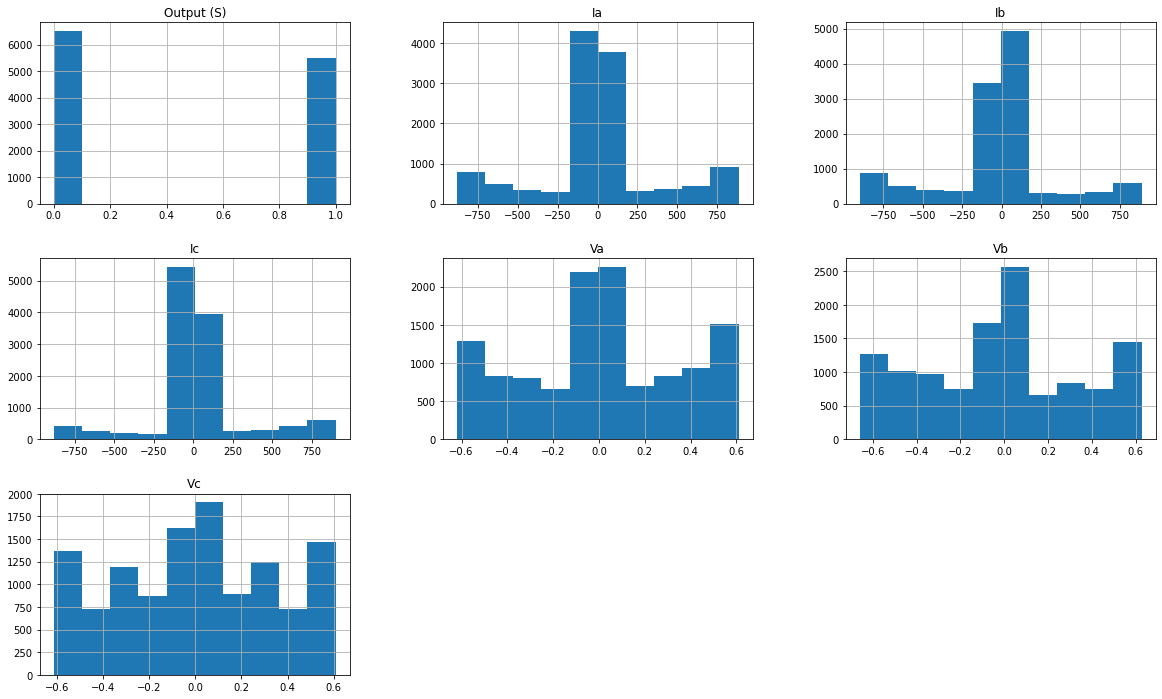

In [37]:
# Histogram using pandas 
df.hist(figsize=(20,12))

### Count plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


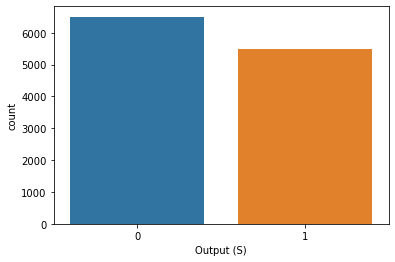

In [38]:
# count plot of Output (S) column
sns.countplot(df['Output (S)'])
plt.show()

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

{'boxes': [<matplotlib.lines.Line2D at 0x7fb664223ad0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fb66422ab10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb664231b50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fb664231610>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fb66422a090>,
  <matplotlib.lines.Line2D at 0x7fb66422a5d0>]}

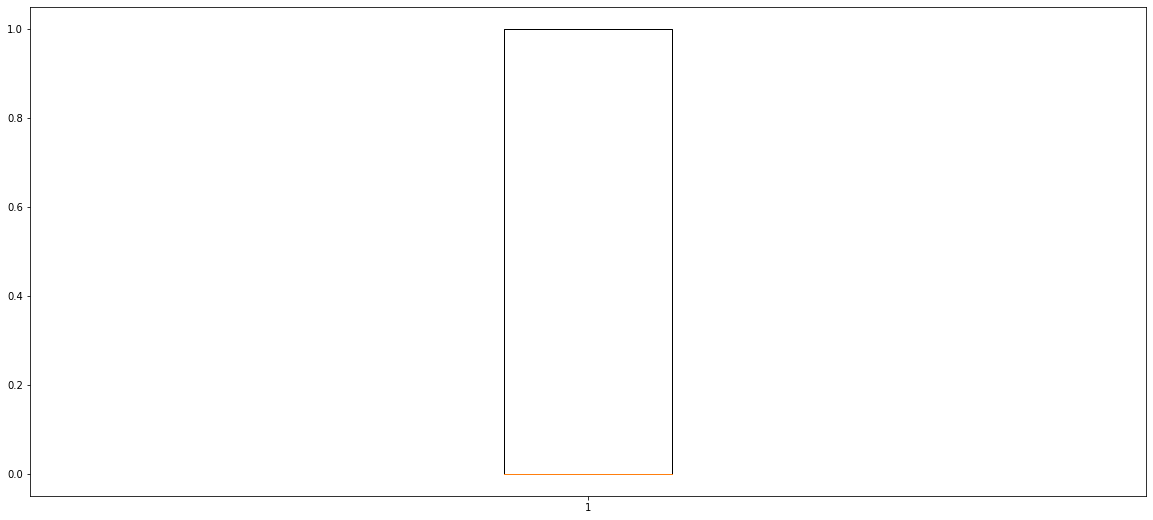

In [130]:
# box plot using pandas 
# box plot for Output (S) column 

plt.figure(figsize=(20,9))
df.boxplot(column='Output (S)')
plt.show()

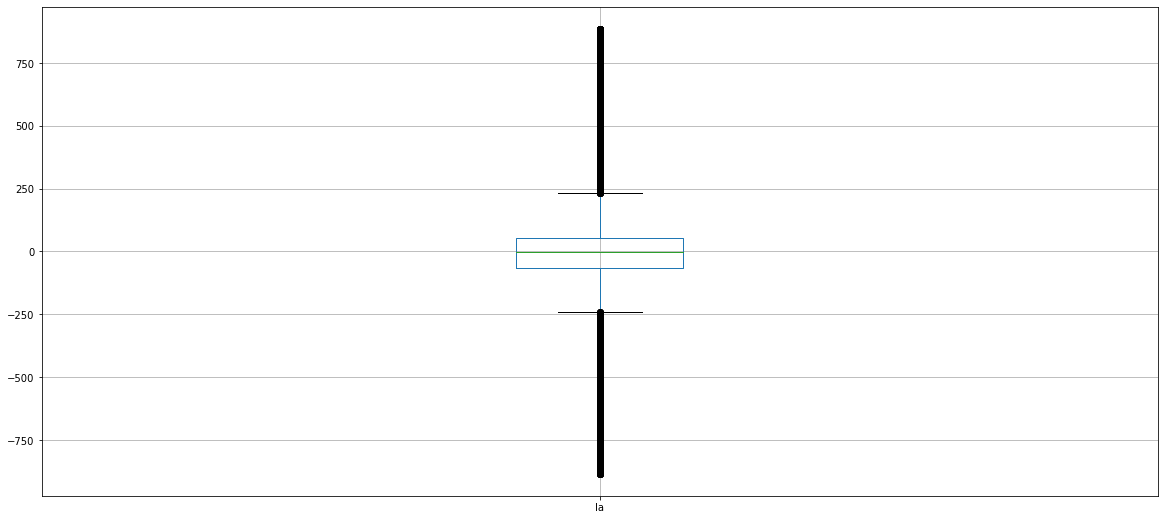

In [25]:
# box plot using pandas 
# box plot for Ia column 

plt.figure(figsize=(20,9))
df.boxplot(column='Ia')
plt.show()

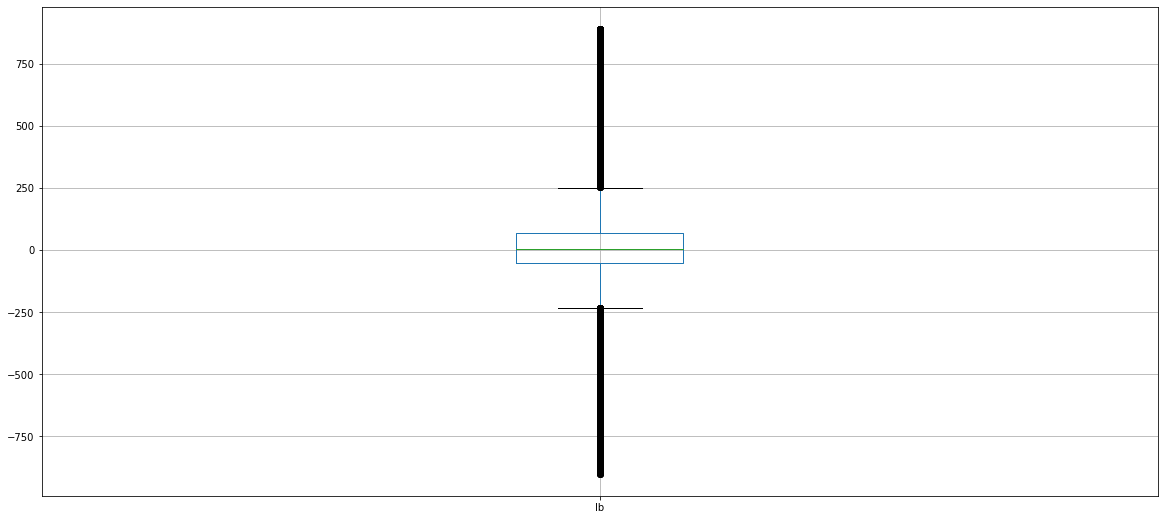

In [24]:
# box plot using pandas 
# box plot for Ib column 

plt.figure(figsize=(20,9))
df.boxplot(column='Ib')
plt.show()

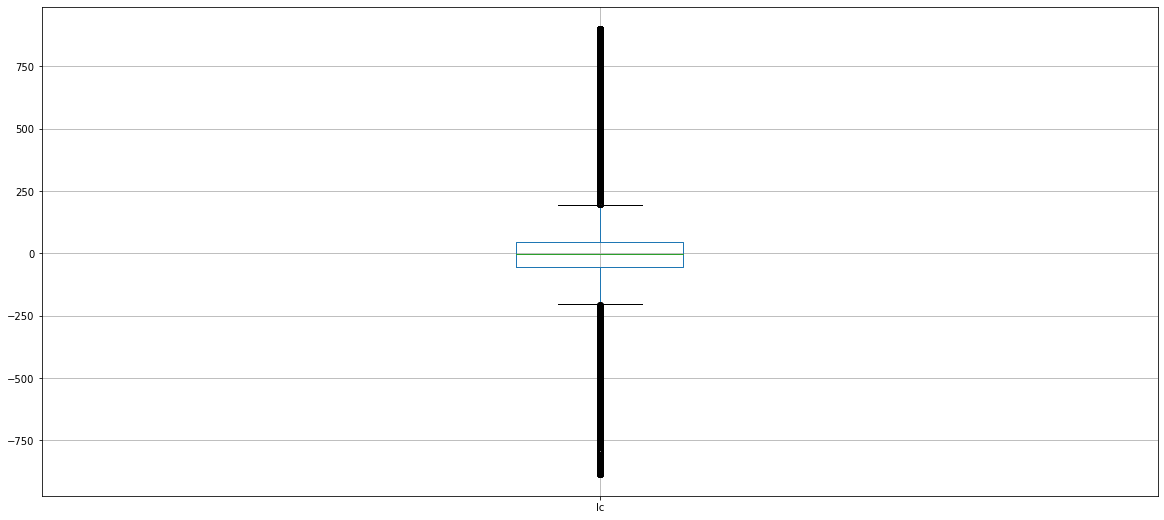

In [23]:
# box plot using pandas 
# box plot for Ic column 

plt.figure(figsize=(20,9))
df.boxplot(column='Ic')
plt.show()

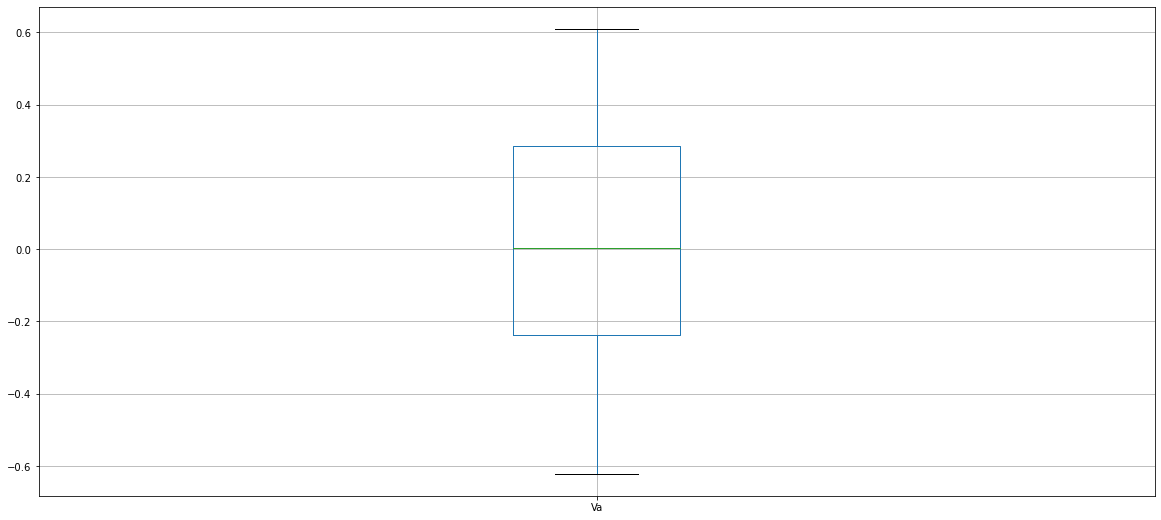

In [22]:
# box plot using pandas 
# box plot for Va column 

plt.figure(figsize=(20,9))
df.boxplot(column='Va')
plt.show()

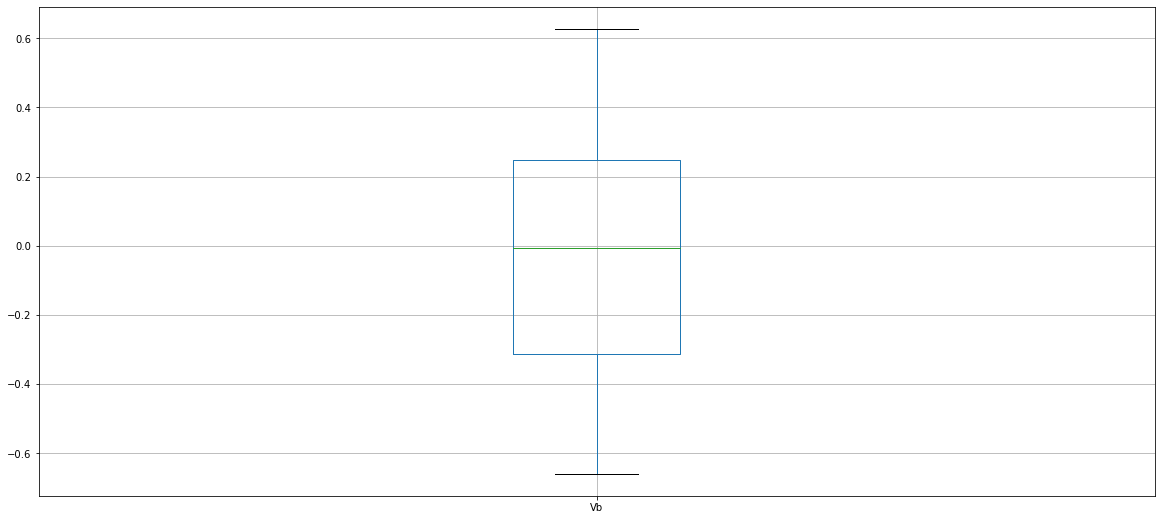

In [21]:
# box plot using pandas 
# box plot for Vb column 

plt.figure(figsize=(20,9))
df.boxplot(column='Vb')
plt.show()

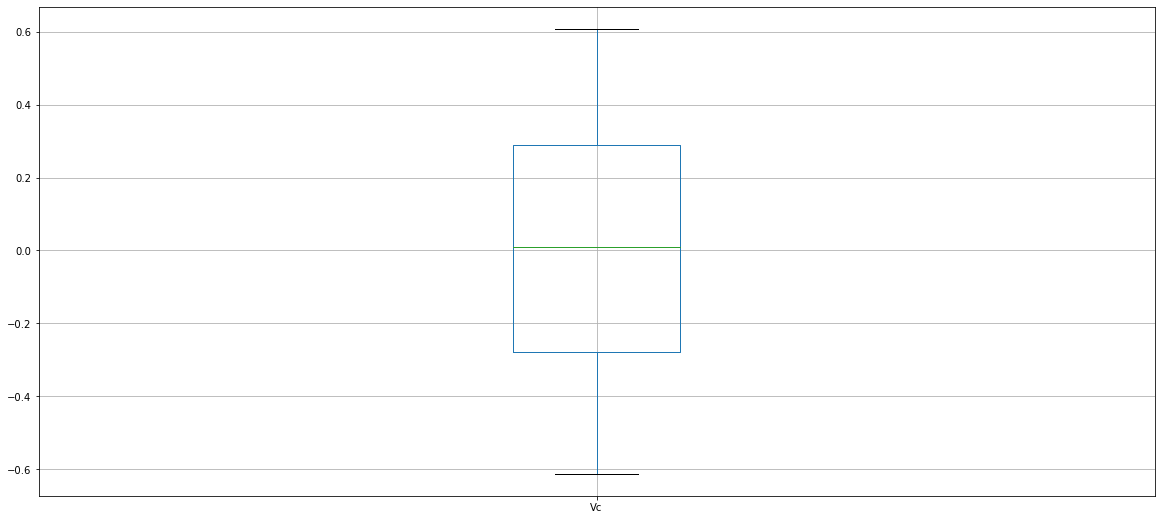

In [20]:
# box plot using pandas 
# box plot for Vc column 

plt.figure(figsize=(20,9))
df.boxplot(column='Vc')
plt.show()

Dataset is balanced and not skewed in nature

# Dendrogram

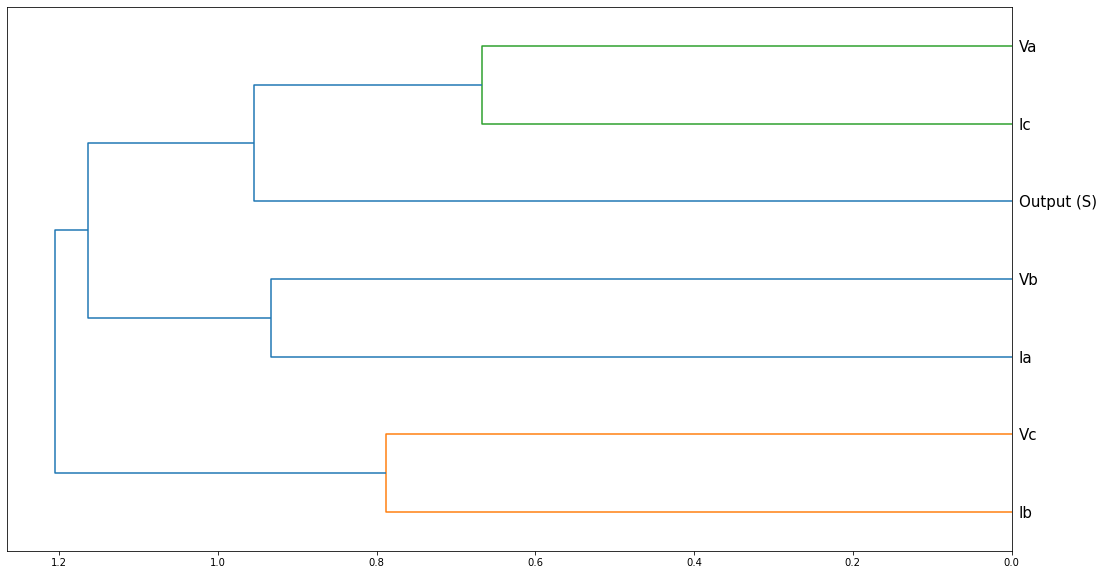

In [26]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values
X = df.dropna()

import scipy
from scipy import stats
from scipy.cluster import hierarchy

corr = np.round(scipy.stats.spearmanr(X).correlation,4)

corr_condensed = hierarchy.distance.squareform(1-corr)

fig = plt.figure(figsize=(18,10))

dendrogram = hierarchy.dendrogram(hierarchy.linkage(corr_condensed,method='average'),
                     labels=X.columns,orientation='left',leaf_font_size=15)

plt.show()

# Preprocessing, Modeling and prediction on test data

In [39]:
## Split the labels and the target
X=df.drop('Output (S)',axis=1)

y = df['Output (S)']
#check the shape 
X.shape, y.shape

((12001, 6), (12001,))

In [40]:
# import train test split
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# check shape of X_train and y_train
print(X_train.shape, y_train.shape)

# check shape of X_test and y_test
print(X_test.shape, y_test.shape)

(9600, 6) (9600,)
(2401, 6) (2401,)


### Scaling

In [41]:
# import min max scalar
def sclaed_score(df,col):
# Instantiate t
    from sklearn.preprocessing import MinMaxScaler

# fit on train data
    scaler=MinMaxScaler()
    df[col]=scaler.fit_transfom(df[col])
# fit on test data
    return df

In [42]:
# Visualize importance of all the features in the dataset for the prediction
def feature_imp(feature_importance,feature_train_df):
    


    # creating dataframe for feature name and feature importance
    feature_imp_df=pd.DataFrame()
    _df=pd.DataFrame()
    _df['feature_imp'] = feature_importance
    _df['column'] = feature_train_df.columns
    feature_imp_df=pd.concat([feature_imp_df,_df],axis=0,ignore_index=True)

    # grouping all data and sorting in descending order
    descend_ordr = feature_imp_df.groupby('column').sum()[['feature_imp']].sort_values('feature_imp',ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    # return fig, ax
    fig,ax = plt.subplots(figsize=(8,max(6,len(descend_ordr)*.25)))
    # Visualize importance of all the features in the dataset for the prediction
    sns.boxenplot(data=feature_imp_df,x='feature_imp',y='column',order=descend_ordr,ax=ax,palette='viridis',orient='h')
    ax.tick_params(axis='x',rotation=90)
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig,ax

In [43]:
# import accuracy_score, precision_score, precision_score, confusion_matrix

from sklearn.metrics import precision_score,accuracy_score,confusion_matrix

## LogisticRegression

The accuracy_score 0.7371928363182008
The precision_score 1.0
The confusion_matrix [[1306    0]
 [ 631  464]]
Wall time: 448 ms


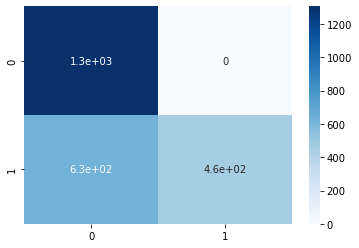

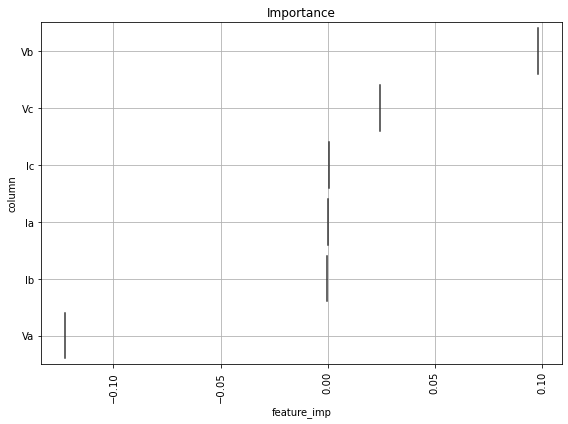

In [44]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegressor
from sklearn.linear_model import LogisticRegression


# Instantiate the model
log_class=LogisticRegression()
# fitting the model on train data

log_class.fit(X_train,y_train)
#predict on test data
prediction=log_class.predict(X_test)
# print accuracy_score,precision_score,precision_score,confusion_matrix
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')
print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))
# visualizing importance of features

fig,ax=feature_imp(log_class.coef_[0],X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))

## RandomForestClassifier

The accuracy_score 0.9979175343606831
The precision_score 0.9963570127504554
The confusion_matrix [[1302    4]
 [   1 1094]]
Wall time: 2.78 s


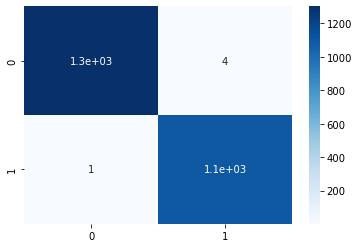

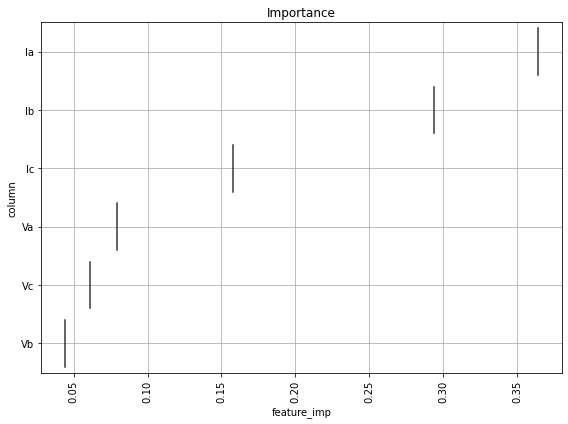

In [45]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model

random_forest=RandomForestClassifier()
# fitting the model on train data

random_forest.fit(X_train,y_train)
# predict on test data

prediction=random_forest.predict(X_test)
# print accuracy_score,precision_score,precision_score,confusion_matrix

print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')

# visualizing importance of features

fig,ax=feature_imp(random_forest.feature_importances_,X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))

## DecisionTreeClassifier

The accuracy_score 0.9958350687213661
The precision_score 0.9945305378304466
The confusion_matrix [[1300    6]
 [   4 1091]]
Wall time: 522 ms


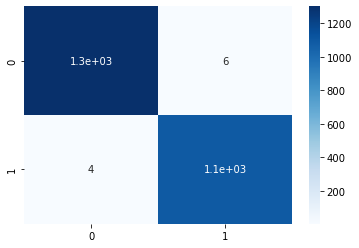

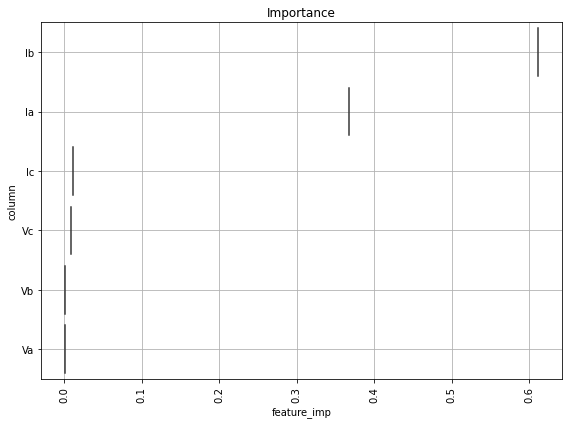

In [46]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model

decison_tree=DecisionTreeClassifier()
# fitting the model on train data
decison_tree.fit(X_train,y_train)

# predict on test data
prediction=decison_tree.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')
print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))



# visualizing importance of features


fig,ax=feature_imp(decison_tree.feature_importances_,X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))



## GradientBoostingClassifier

The accuracy_score 0.9966680549770929
The precision_score 0.9972552607502287
The confusion_matrix [[1303    3]
 [   5 1090]]
Wall time: 4.05 s


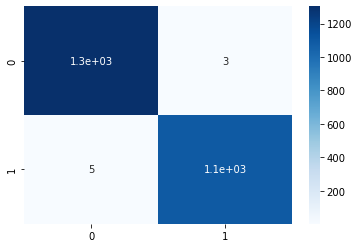

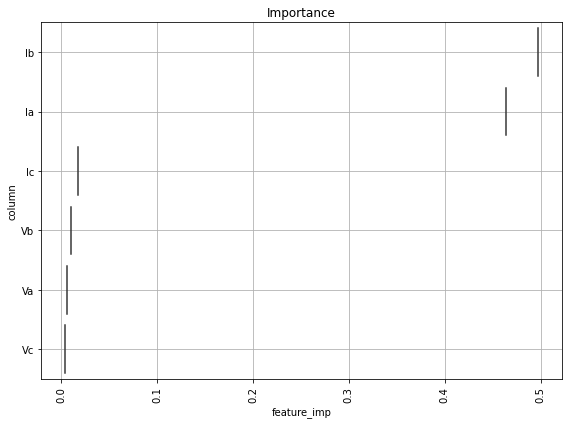

In [47]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gradient=GradientBoostingClassifier()

# fitting the model on train data

gradient.fit(X_train,y_train)
# predict on test data
prediction=gradient.predict(X_test)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')
# print accuracy_score,precision_score,precision_score,confusion_matrix

print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))


# visualizing importance of features


fig,ax=feature_imp(gradient.feature_importances_,X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))


## Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [48]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
    from sklearn.model_selection import RandomizedSearchCV

    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    # Fit the random search model
    random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
  
    #fit on train
    random.fit(X_train,y_train)
    # print best_params_
    print(random.best_params_)

In [49]:
%%time
# for random forest classifier
# create parameters dict for tunning
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train, y_train,param_grid=rf_para_grid)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Wall time: 1min 18s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


The accuracy_score 0.9975010412328197
The precision_score 0.9963536918869644
The confusion_matrix [[1302    4]
 [   2 1093]]
Wall time: 4.37 s


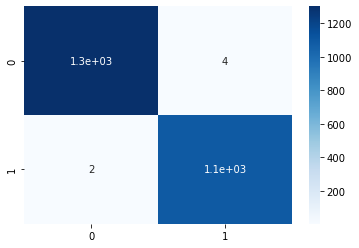

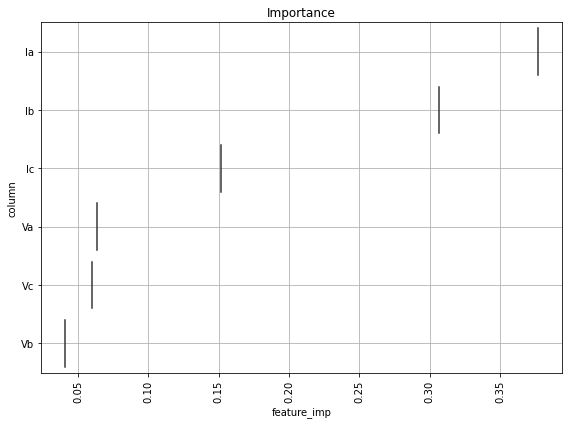

In [50]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model

random_forest=RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True})
# fitting the model on train data

random_forest.fit(X_train,y_train)
# predict on test data

prediction=random_forest.predict(X_test)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')
# print accuracy_score,precision_score,precision_score,confusion_matrix

print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))


# visualizing importance of features

fig,ax=feature_imp(random_forest.feature_importances_,X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))


### working with best model

In [51]:
# print Area under ROC of Model On Test Set
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,prediction))

0.9975553644227205


In [52]:
# Create a dataframe with predicted result as data using best model
data_frame=random_forest.predict(X_test)
data_1=pd.DataFrame(data_frame)

In [53]:
data_1.head()

,0
0,0
1,1
2,0
3,0
4,0


# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well.  We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.